# 사무지역 정의
## 통계지리정보서비스 - 생활업종 통계지도
데이터 출처 : https://sgis.kostat.go.kr/view/bizStats/bizStatsMap?biz=0#
    - 통계메뉴 → 후보지 정보 보기 → 대상 지역 선택 → 조건 검색

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import matplotlib
from numpy import inf

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

In [2]:
seoul_daegu = pd.read_excel("../data/external_data/processed_data/통계지리정보서비스_생할업종통계지도.xlsx")

In [3]:
seoul_daegu = seoul_daegu.sort_values(by='직장인구비율', ascending=False)

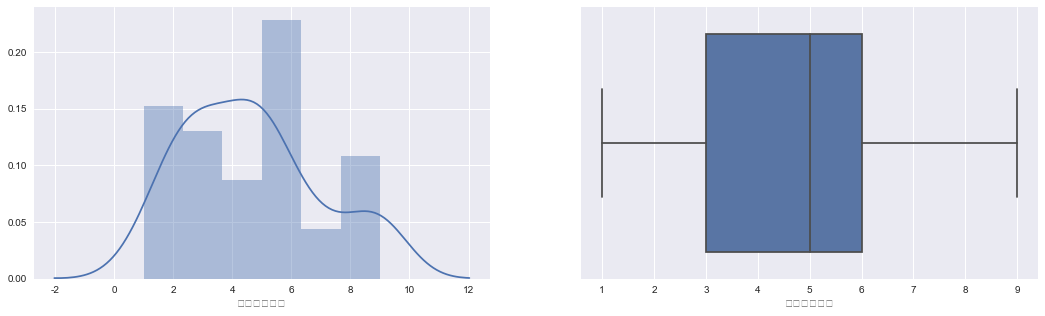

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
sns.distplot(seoul_daegu['직장인구비율'], ax=axes[0])
sns.boxplot(seoul_daegu['직장인구비율'], ax=axes[1])

In [5]:
seoul_daegu['직장인구비율'].describe()

count    69.000000
mean      4.623188
std       2.301543
min       1.000000
25%       3.000000
50%       5.000000
75%       6.000000
max       9.000000
Name: 직장인구비율, dtype: float64

In [6]:
# 상위 20%인 직장인구비율
seoul_daegu['직장인구비율'].sort_values().reset_index(drop=True)[int(seoul_daegu.shape[0]*0.8)]

7

- **직장인구비율이 7 이상인 지역을 사무지역으로 정의하기로 한다.**

In [7]:
seoul = seoul_daegu.query('시도=="서울특별시"').reset_index(drop=True)
daegu = seoul_daegu.query('시도=="대구광역시"').reset_index(drop=True)

In [8]:
# 서울의 직장인구 지역 확인
seoul.loc[seoul['직장인구비율'] >= 7]

,시도,시군구,읍면동,직장인구비율,거주인구비율
0,서울특별시,중구,을지로동,9,1
1,서울특별시,중구,필동,9,1
2,서울특별시,중구,명동,9,1
3,서울특별시,중구,소공동,9,1
4,서울특별시,중구,회현동,9,1
5,서울특별시,중구,광희동,9,1
6,서울특별시,중구,신당동,8,2
7,서울특별시,중구,장충동,7,3


In [9]:
# 대구의 직장인구 지역 확인
daegu.loc[daegu['직장인구비율'] >= 7]

,시도,시군구,읍면동,직장인구비율,거주인구비율
0,대구광역시,중구,성내2동,9,1
1,대구광역시,중구,성내1동,9,1
2,대구광역시,중구,삼덕동,8,2
3,대구광역시,중구,동인동,7,3
4,대구광역시,수성구,두산동,7,3
5,대구광역시,중구,남산2동,7,3
